In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['diagnoz'] = np.where(df[1] == 'M', 1, 0)
features = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave points', 'Symmetry', 'Fractal dimension']

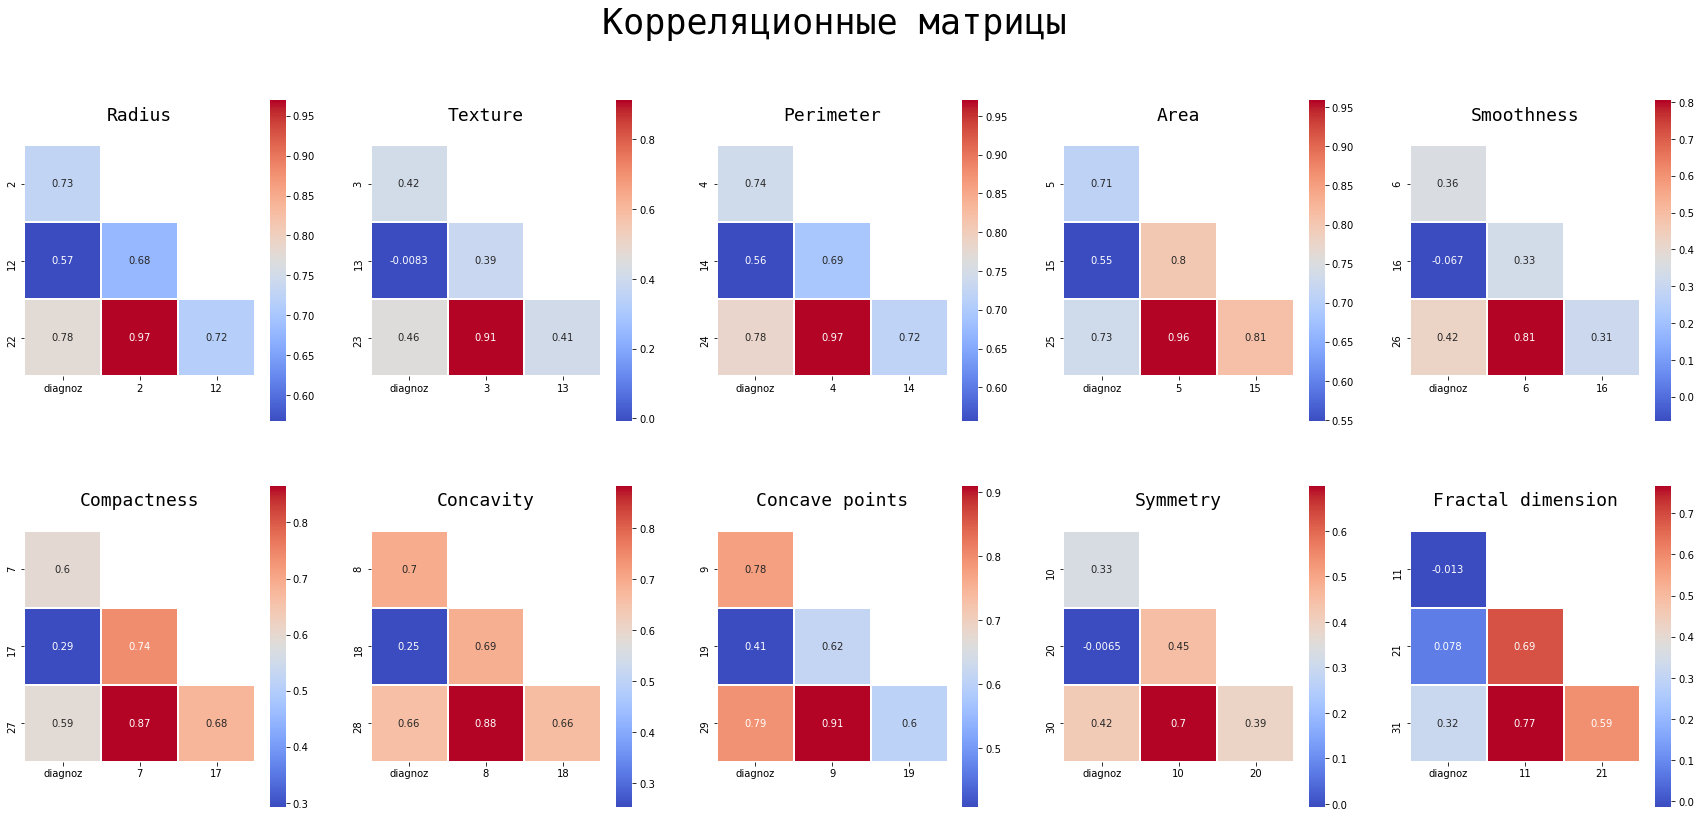

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(30, 13))
for i in range(10):
    corr_matrix = np.triu(df[['diagnoz', i + 2, i + 12, i + 22]].corr())[1:]
    corr_matrix = np.delete(corr_matrix,-1,1)
    df_mtrix = df[['diagnoz', i + 2, i + 12, i + 22]].corr().drop('diagnoz').drop(i + 22, axis=1)
    sn.heatmap(df_mtrix, annot=True, cmap='coolwarm', mask=corr_matrix, ax=axes[i // 5, i % 5], linewidth=1, linecolor='w', square=True)
    axes[i // 5, i % 5].set_title(features[i], size=18, fontfamily = 'monospace', fontstyle = 'normal', pad =25)
fig.suptitle('Корреляционные матрицы', fontsize = 35, fontfamily = 'monospace', fontstyle = 'normal')
plt.show()

In [6]:
df.drop([2, 12, 3, 4, 14, 5, 15, 6, 17, 27, 18, 28, 9, 19, 10, 11, 21, 0, 1], axis=1, inplace=True)

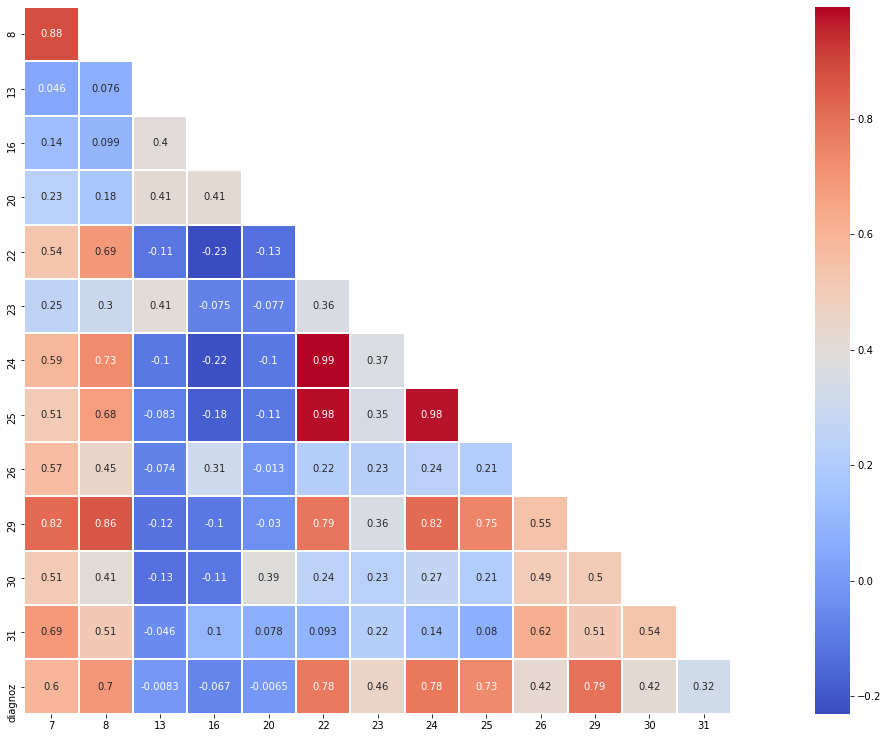

In [7]:
fig, ax = plt.subplots(figsize=(30, 13))
corr_matrix = np.triu(df.corr())[1:]
corr_matrix = np.delete(corr_matrix,-1,1)
df_mtrix = df.corr().drop(7).drop('diagnoz', axis=1)
sn.heatmap(df_mtrix, annot=True, cmap='coolwarm', mask=corr_matrix, linewidth=1, linecolor='w', square=True, ax=ax)
plt.show()

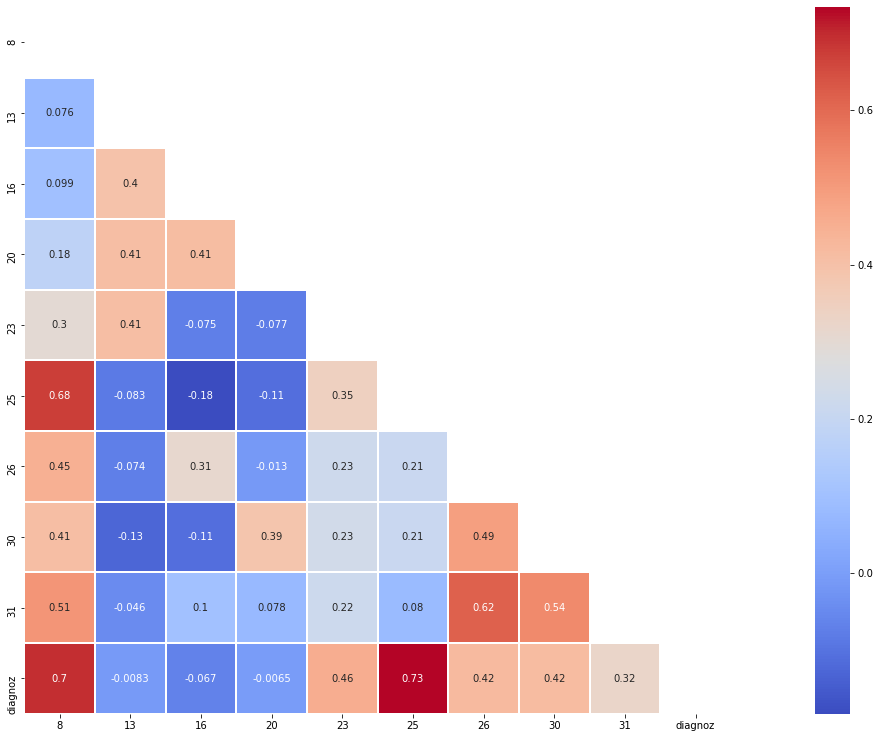

In [8]:
fig, ax = plt.subplots(figsize=(30, 13))
corr_matrix = np.triu(df.drop([22, 7, 29, 24], axis=1).corr())
df_mtrix = df.drop([22, 7, 29, 24], axis=1).corr()
sn.heatmap(df_mtrix, annot=True, cmap='coolwarm', mask=corr_matrix, linewidth=1, linecolor='w', square=True, ax=ax)
plt.show()